In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv('./movies/movies.csv')
tags = pd.read_csv('./movies/tags.csv')
ratings = pd.read_csv('./movies/ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Do *Science Fiction Movies tends to be rated more highly than other movies genres??* 
  **we are going to do analysis of this **

In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [10]:
movies.isnull().values.any()

False

In [11]:
tags.isnull().values.any()

True

In [12]:
ratings.isnull().values.any()

False

In [13]:
tags.isna().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [14]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [19]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,27278.0,59855.48057,44429.314697,1.0,6931.25,68068.0,100293.25,131262.0


In [20]:
tags.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,465564.0,6.871235e+04,4.187767e+04,1.800000e+01,2.878000e+04,7.020100e+04,1.073220e+05,1.384720e+05
movieId,465564.0,3.262776e+04,3.608024e+04,1.000000e+00,2.571000e+03,7.373000e+03,6.223500e+04,1.312580e+05
timestamp,465564.0,1.298711e+09,7.920891e+07,1.135429e+09,1.245007e+09,1.302291e+09,1.366218e+09,1.427771e+09


In [21]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,20000263.0,6.904587e+04,4.003863e+04,1.0,34395.0,6.914100e+04,1.036370e+05,1.384930e+05
movieId,20000263.0,9.041567e+03,1.978948e+04,1.0,902.0,2.167000e+03,4.770000e+03,1.312620e+05
rating,20000263.0,3.525529e+00,1.051989e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,20000263.0,1.100918e+09,1.621694e+08,789652004.0,966797745.0,1.103556e+09,1.225642e+09,1.427784e+09


In [27]:
tags['tag'].isnull().any()

True

In [43]:
null_tags = tags[pd.isnull(tags['tag'])]

In [42]:
null_tags.count()

userId       16
movieId      16
tag           0
timestamp    16
dtype: int64

In [44]:
null_tags

,userId,movieId,tag,timestamp
373276,116460,123,NaN,1199450867
373277,116460,346,NaN,1199451946
373281,116460,1184,NaN,1199452261
373288,116460,1785,NaN,1199452006
373289,116460,2194,NaN,1199450677
373291,116460,2691,NaN,1199451002
373299,116460,4103,NaN,1199451920
373301,116460,4473,NaN,1199451040
373303,116460,4616,NaN,1199452441
373319,116460,7624,NaN,1199452266


In [69]:
null_tags_movieid = null_tags['movieId']

In [61]:
null_tags_movieid

373276      123
373277      346
373281     1184
373288     1785
373289     2194
373291     2691
373299     4103
373301     4473
373303     4616
373319     7624
373325     8898
373332    32460
373334    33826
373339    36537
373340    55805
454615    33826
Name: movieId, dtype: int64

above are movieId of null tags. now we will check we have same movieId present in ratings or not. 

In [78]:
for i in null_tags_movieid:
    rate = i in ratings['movieId']
    gener = i in movies['movieId']
print(rate)
print(gener)

True
False


As genres does not contain thoes movieId but rating contains those movieId which has no tags. so, we want it for genres analysis so, in genres it is not present so it is possible that we can exclude them from our dataframe.

In [84]:
print(tags.count())
cleaned_tags = tags.dropna()
cleaned_tags.count()

userId       465564
movieId      465564
tag          465548
timestamp    465564
dtype: int64


userId       465548
movieId      465548
tag          465548
timestamp    465548
dtype: int64

In [86]:
cleaned_tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [87]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [88]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [92]:
is_highly_rated = ratings['rating']>=4.0

In [102]:
genres_list = []
ggg = movies['genres'].str.split('|')
for gg in ggg:
    for g in gg:
        if g not in genres_list:
            genres_list.append(g)
genres_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [112]:
# sifi = movies['genres'].str.contains('Sci-Fi')
high_rated_movies = ratings[is_highly_rated]
high_rated_movies.drop(['userId'], axis=1).head()


,movieId,rating,timestamp
6,151,4.0,1094785734
7,223,4.0,1112485573
8,253,4.0,1112484940
9,260,4.0,1112484826
10,293,4.0,1112484703


In [116]:
movies_of_fiction = movies['genres'].str.contains('Sci-Fi')
scifi_movies = movies[movies_of_fiction]
scifi_movies.head()

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
75,76,Screamers (1995),Action|Sci-Fi|Thriller


In [122]:
scifi_movies.join(high_rated_movies, on='movieId', how='inner', lsuffix='_left', rsuffix='_right').count()

movieId          959
movieId_left     959
title            959
genres           959
userId           959
movieId_right    959
rating           959
timestamp        959
dtype: int64

In [125]:
high_rated_movies = ratings[is_highly_rated]
high_rated_movies = high_rated_movies.drop(['userId'], axis=1)
high_rated_movies.head()

,movieId,rating,timestamp
6,151,4.0,1094785734
7,223,4.0,1112485573
8,253,4.0,1112484940
9,260,4.0,1112484826
10,293,4.0,1112484703


In [180]:
# import warnings
# warnings.filterwarnings("ignore", 'This pattern has match groups')
rows_cnt = []
for g in genres_list:
    movies_of = movies['genres'].str.contains(g)
    m = movies[movies_of]
    cnt = m.join(high_rated_movies, on='movieId', how='inner', lsuffix='_left', rsuffix='_right')
    rows_cnt.append(cnt['movieId'].count())
#     print(g," movie number of ratings = ",cnt)
rows_cnt
# print(cnt['movieId'].count())
# print(cnt.count())

[1260,
 551,
 620,
 4456,
 741,
 2116,
 6973,
 1880,
 1518,
 2175,
 1402,
 782,
 959,
 94,
 1282,
 626,
 541,
 363,
 169,
 142]

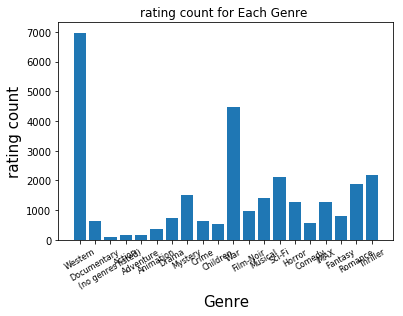

In [205]:
index = np.arange(len(genres_list))
# no_of_movies = np.arange(len(rows_cnt))
rows_cnt.sort()
plt.bar(genres_list, rows_cnt)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('rating count', fontsize=15)
plt.xticks(genres_list, fontsize=8, rotation=30)
plt.title('rating count for Each Genre ')
plt.show()